In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117031 sha256=b15372195ed2e29e0a04acc22410b2e9a8016bf975604446d423a37b53b5c27a
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

In [3]:
import os
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt


2024-05-16 17:01:11.968259: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 17:01:11.968400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 17:01:12.099343: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


24-05-16 17:01:23 - Directory /root/.deepface created
24-05-16 17:01:23 - Directory /root/.deepface/weights created


In [15]:
# Chemin vers le répertoire contenant les images
image_dir = "/kaggle/input/phototest"

In [16]:
# Charger le classificateur de cascade de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [17]:
# Liste des images dans le répertoire
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

In [18]:
# Fonction pour afficher les résultats
def display_image_with_emotion(image, faces, emotions):
    for (x, y, w, h), emotion in zip(faces, emotions):
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

[{'emotion': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 100.0, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.0}, 'dominant_emotion': 'happy', 'region': {'x': 28, 'y': 26, 'w': 258, 'h': 258, 'left_eye': (207, 121), 'right_eye': (96, 126)}, 'face_confidence': 0.88}]


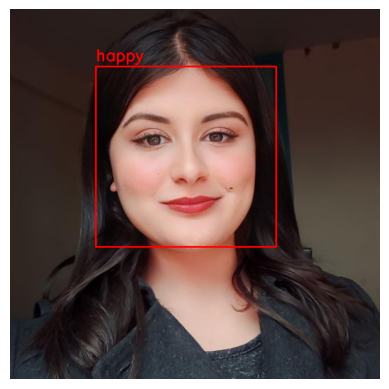

In [19]:
# Analyser les émotions sur chaque image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    
    # Convertir l'image en niveau de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Détecter les visages dans l'image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    emotions = []
    for (x, y, w, h) in faces:
        # Extraire la ROI du visage
        face_roi = image[y:y + h, x:x + w]
        
        # Analyser les émotions sur la ROI
        result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)
        
        # Afficher le résultat pour comprendre sa structure
        print(result)

        # Déterminer l'émotion dominante
        if isinstance(result, list):
            emotion = result[0]['dominant_emotion']
        else:
            emotion = result['dominant_emotion']

        emotions.append(emotion)
    
    # Afficher l'image avec les rectangles et les étiquettes d'émotion
    display_image_with_emotion(image, faces, emotions)
